<a href="https://colab.research.google.com/github/edypj/ComputerVision/blob/main/FaceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml

--2024-03-31 22:50:03--  https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml [following]
--2024-03-31 22:50:03--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.1’

haarcascade_frontal 100%[===================>] 908.33K  5.23MB/s    in 0.2s    



In [8]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# Autentikasi dan mount Google Drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [15]:
# Ambil file gambar dari Google Drive berdasarkan ID file
file_id = '*************'  # Ganti dengan ID file Anda
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('foto1.jpg')  # Simpan gambar sebagai 'foto1.jpg'

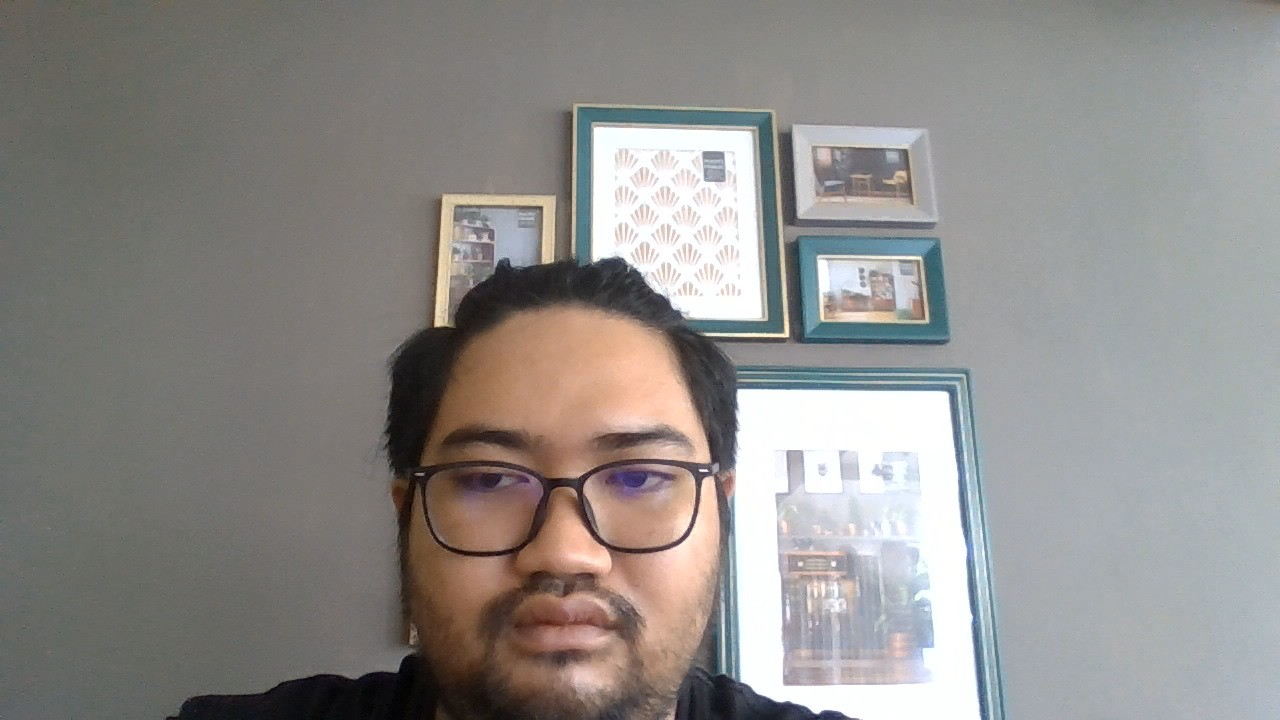

In [16]:
# Baca gambar
image = cv2.imread('foto1.jpg')

# Tampilkan gambar
cv2_imshow(image)

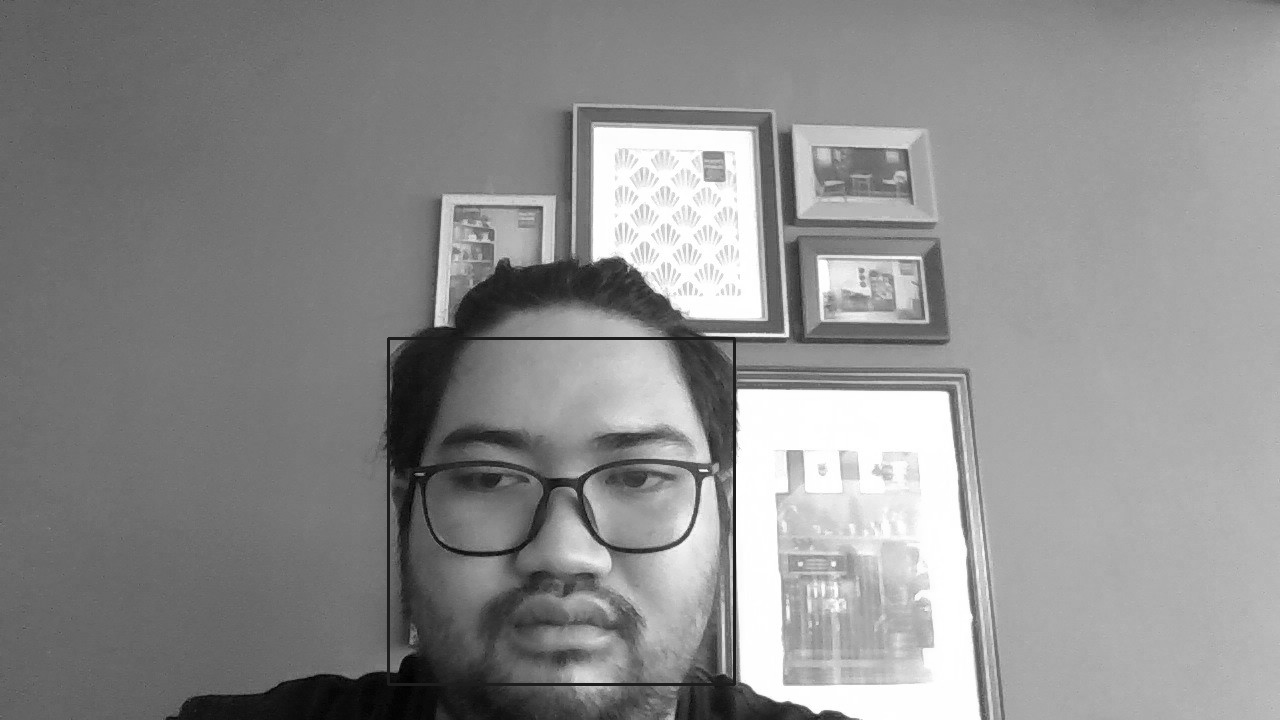

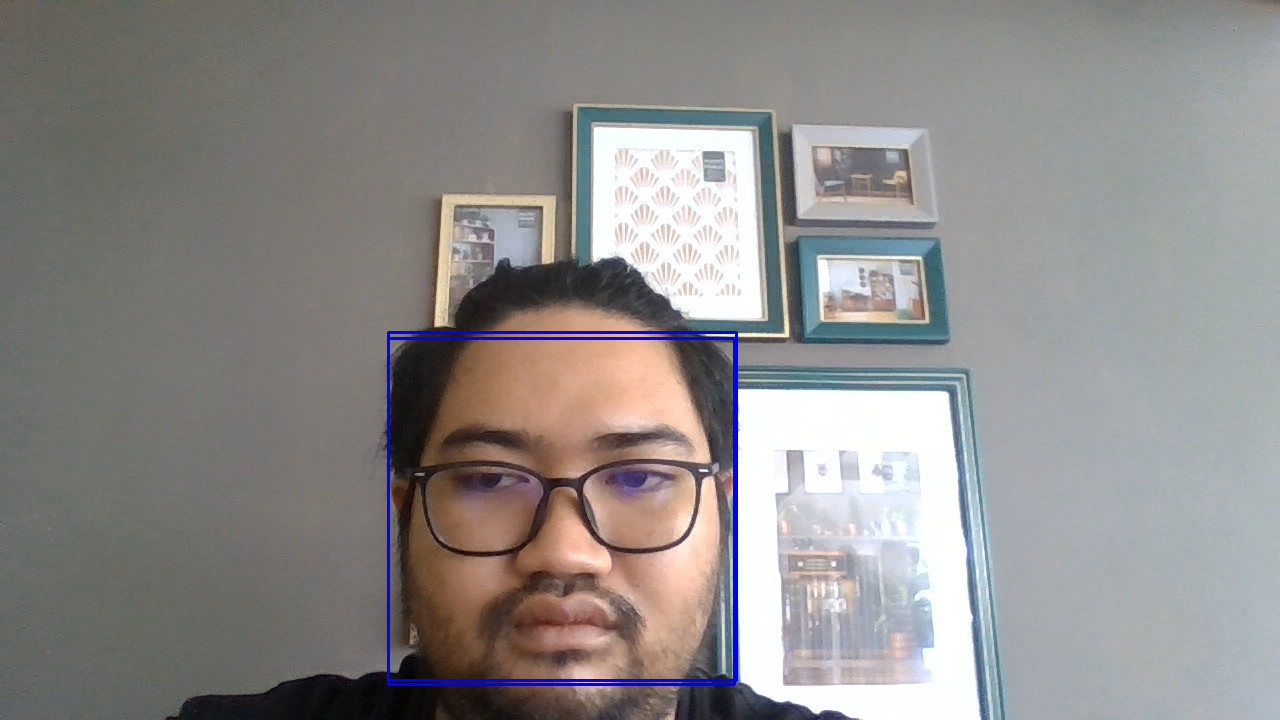

In [18]:
# Konversi gambar ke grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Inisialisasi detektor wajah
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Deteksi wajah
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# Gambar kotak di sekitar wajah yang terdeteksi
for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)

# Tampilkan hasil
cv2_imshow(gray)
cv2_imshow(image)